In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
df = pd.read_csv('/kaggle/input/iris02/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df_copy = df

In [11]:
df_copy['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df_copy.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
X = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_copy['species']

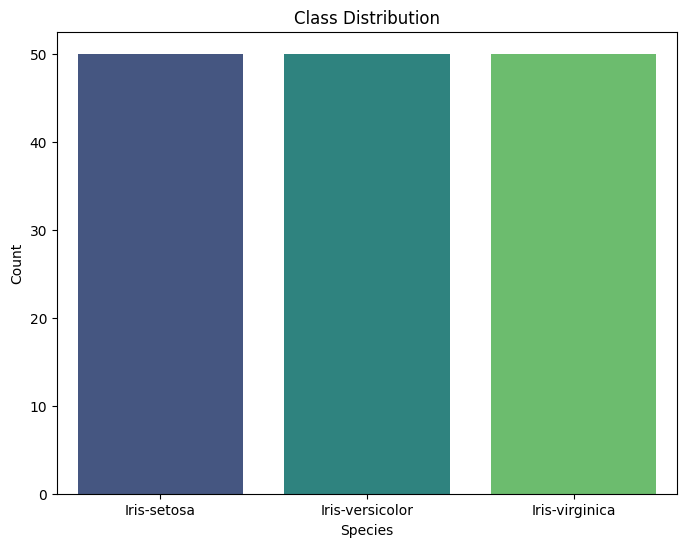

In [14]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

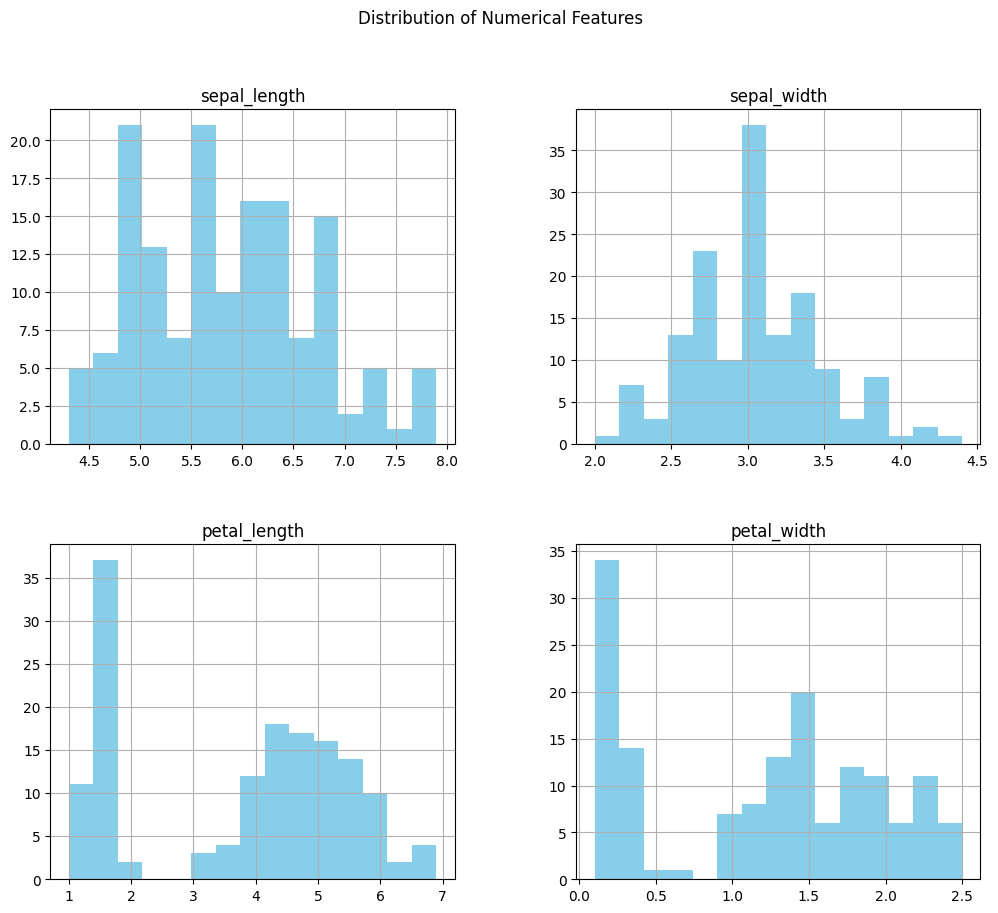

In [15]:
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols].hist(figsize=(12, 10), bins=15, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

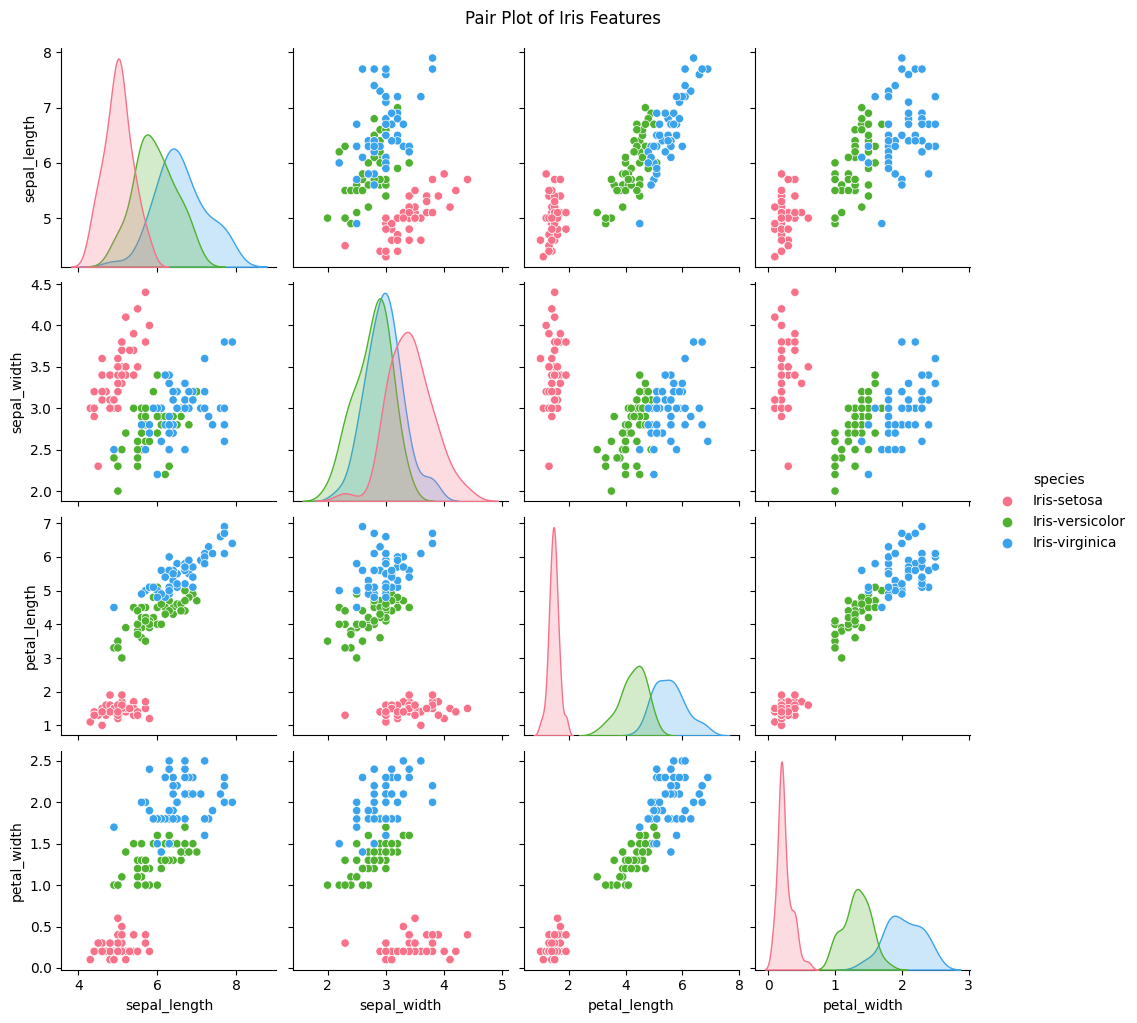

In [16]:
sns.pairplot(df, hue='species', palette='husl', diag_kind='kde')
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()


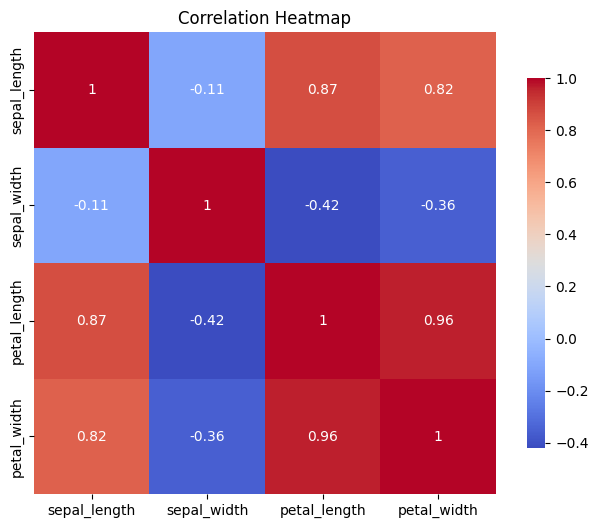

In [17]:
plt.figure(figsize=(8, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap")
plt.show()

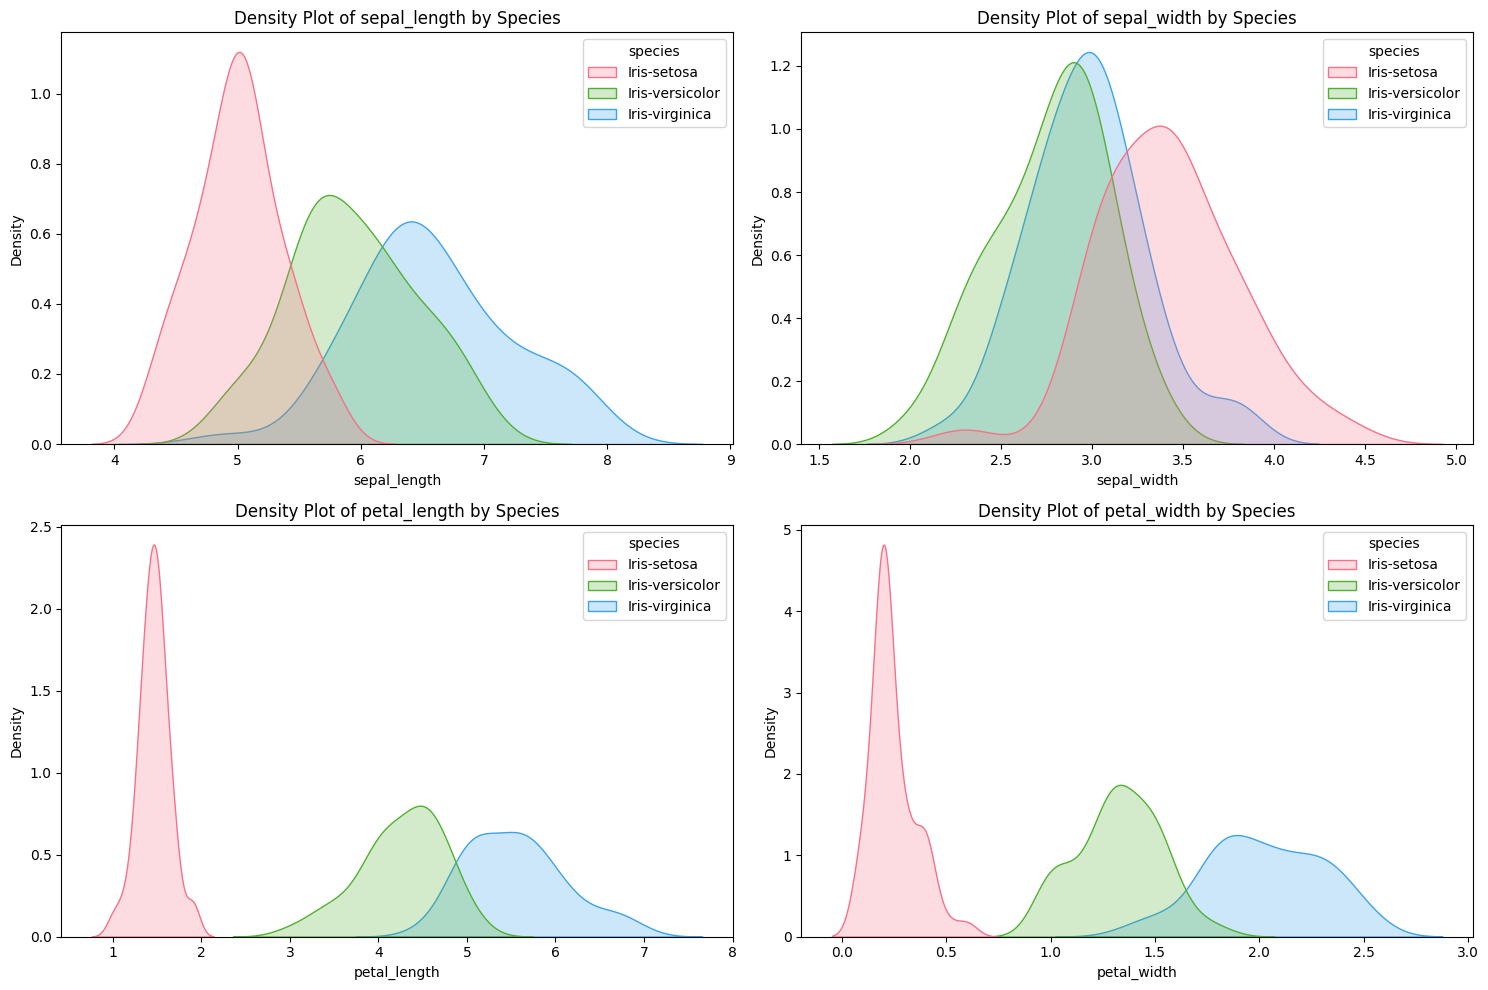

In [18]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data=df, x=col, hue='species', fill=True, common_norm=False, palette='husl')
    plt.title(f"Density Plot of {col} by Species")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=69,test_size=0.25)

In [21]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [22]:
y_pred = svr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error
a = r2_score(y_test,y_pred)
b = mean_absolute_error(y_test,y_pred)
print("r2_score is:",a)
print("the mean absolute error is:",b)

r2_score is: 0.9671872004834161
the mean absolute error is: 0.11919946527322291


In [24]:
## hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [25]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.842 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.851 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.569 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
grid_prediction=grid.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error
a1=r2_score(y_test,grid_prediction)
b1=mean_absolute_error(y_test,grid_prediction)
print(a1)
print(b1)

0.9584109969367008
0.12932615589567836
